In [1]:
# DPOCN Jagoda Lewicka 219951 
# sheet 6

In [2]:
# NN - four randomly chosen nearest neighbors of the target spinson are in the
# group. This method was used in the original q-voter model

In [3]:
# 1. Choose at random one spinson S_i located at site i.
# 2. Decide with probability p, if the spinson will act independently.
# 3. In case of independence, a spinson flips to the opposite state with probability 1/2.
# 4. In other case (conformity), choose q neighbors of site i (a so called q-panel):
# (a) If all the q neighbors are in the same state, i.e. q-panel is unanimous, the
# spinson takes the state of the q neighbors.
# (b) Otherwise, i.e. if q-panel is not unanimous, spinson flips with probability ǫ.


In [5]:
import networkx as nx
import random as rn
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def qvoter_model(q, G, p):
    """Function simulates q-voter model with NN influence group. 
  
    Parameters 
    ----------
    q : int
        
    G : graph
        Underlying topology
  
    Returns 
    -------

    """
        
    spinsons = list(G.nodes()) 
    green_spinsons = list(G.nodes())  # at first all spinsons are green, those are "up" +1
    red_spinsons = [] # "down" -1
        
    for t in range(100):
        
        S = rn.choice(spinsons)  
        
        P = rn.random()
        
        if P <= p: # act independently
            r = rn.random()
            
            if r >= 0.5:
                if S in green_spinsons:
                    green_spinsons.remove(S)
                    red_spinsons.append(S)
                    
                else:
                    red_spinsons.remove(S)
                    green_spinsons.append(S)
            
        else: # conformity
            q_panel = list(G.neighbors(S))
            
            if len(q_panel) >= q:
                q_panel = q_panel[0:q]
                green_counter = 0
                red_counter = 0
                
                for n in q_panel:
                    if n in green_spinsons:
                        green_counter += 1
                        
                    else:
                        red_counter += 1
                        
                if green_counter == q: #all of q neighbors are the same (+1)
                    if S not in green_spinsons:
                        green_spinsons.append(S)
                        red_spinsons.remove(S)
                        
                elif red_counter == q: #all of q neighbors are (-1)
                    if S not in red_spinsons:
                        green_spinsons.remove(S)
                        red_spinsons.append(S)
                    
                #else:
                #    Q = rn.random()
                    
                #    if Q >= 0.5:
                #        if S in green_spinsons:
                #            green_spinsons.remove(S)
                #            red_spinsons.append(S)
                            
                 #       else:
                 #           red_spinsons.remove(S)
                 #           green_spinsons.append(S)
                            
    mag = (len(green_spinsons) - len(red_spinsons))/len(spinsons)
        
    
    result = mag
    
    return result
                                    

In [13]:
G = nx.barabasi_albert_graph(100, 4, seed=None)

In [18]:
m_list_average = []
p_list = np.arange(0, 0.5, 0.02)
M = 1000
for p in p_list:
    m_list = []
    for i in range(M):
        x = qvoter_model(4, G, p)
        m_list.append(x)
    m_list_average.append(np.mean(m_list))

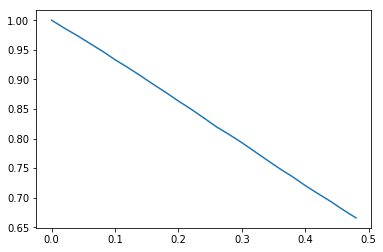

In [17]:
plt.plot(p_list,m_list_average)

In [191]:
L = nx.watts_strogatz_graph(100, 4, 0.01, seed=None)

In [193]:
K = nx.watts_strogatz_graph(100, 4, 0.2, seed=None)

In [206]:
H = nx.complete_graph(100)